## Predicting Continous Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [4]:
df.shape



(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

# The describe function gives us the summary of the data.
# The describe func does not give us the information about the categorical data. or string data.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
## Check If their is null value or not.

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# To create visualizations We need numerical data. So we will extract it and save in numeric_columns.

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

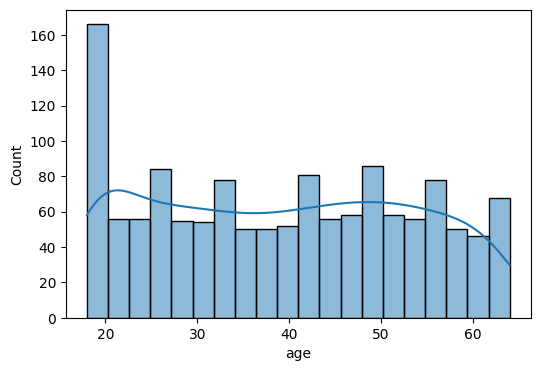

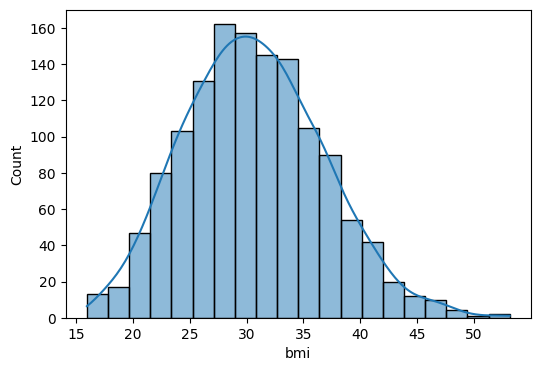

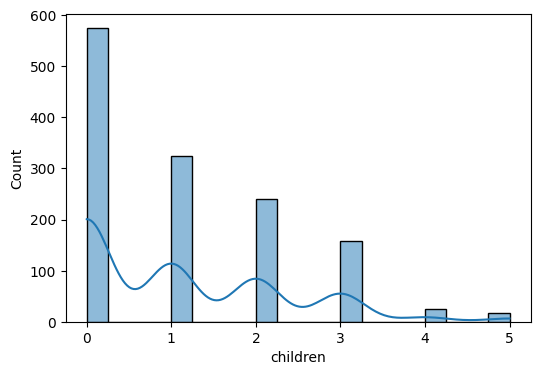

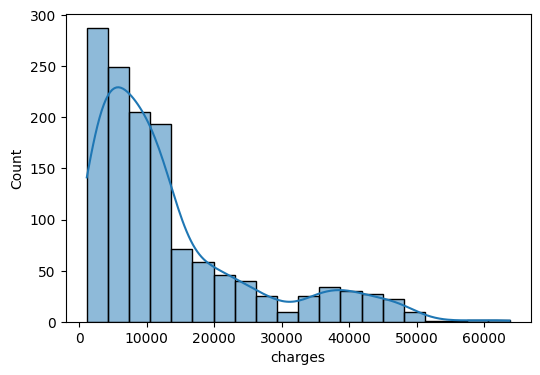

In [10]:
numeric_columns = ['age', 'bmi', 'children', 'charges']

# Now checking their distribution.

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True)

<Axes: xlabel='children', ylabel='count'>

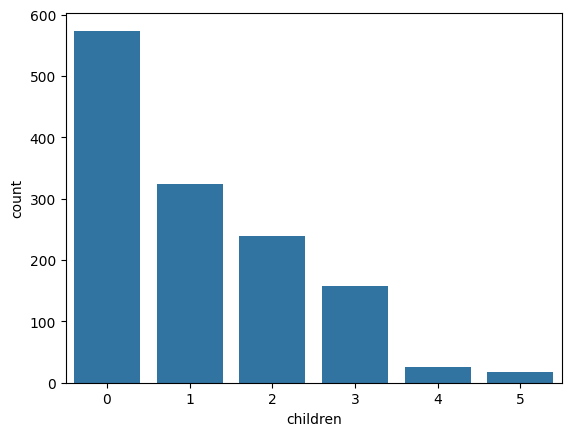

In [11]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

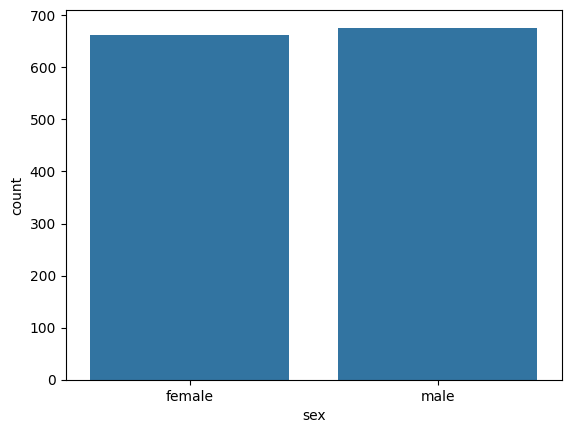

In [12]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='smoker', ylabel='count'>

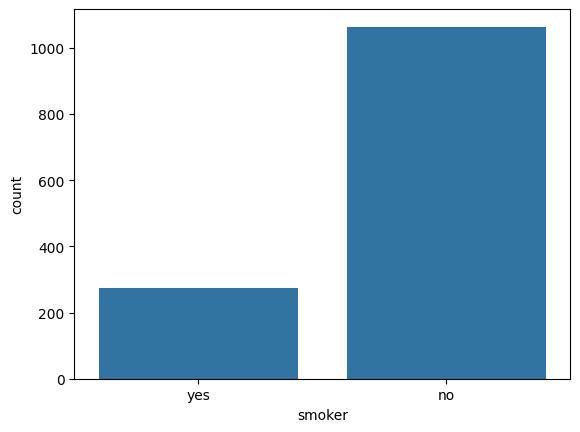

In [13]:
sns.countplot(x='smoker', data=df)

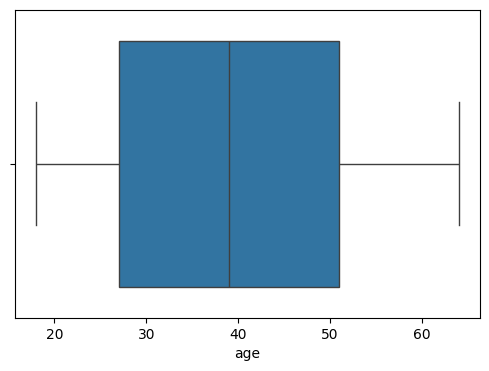

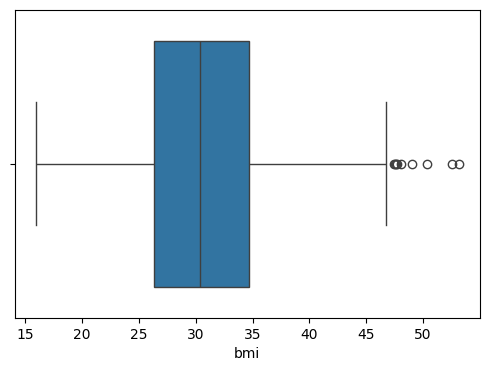

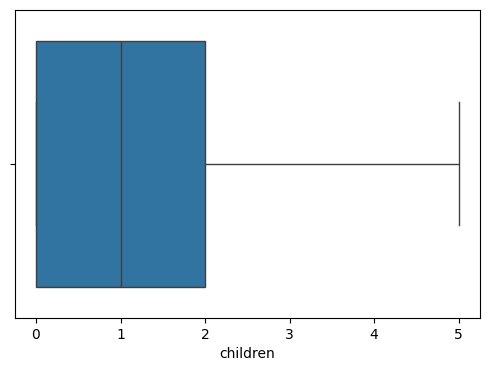

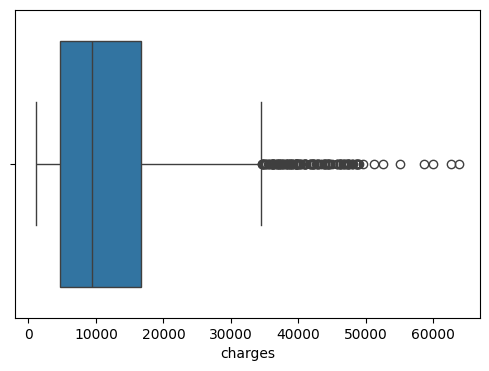

In [14]:
## Now comparing input features with the target variable.

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])

<Axes: >

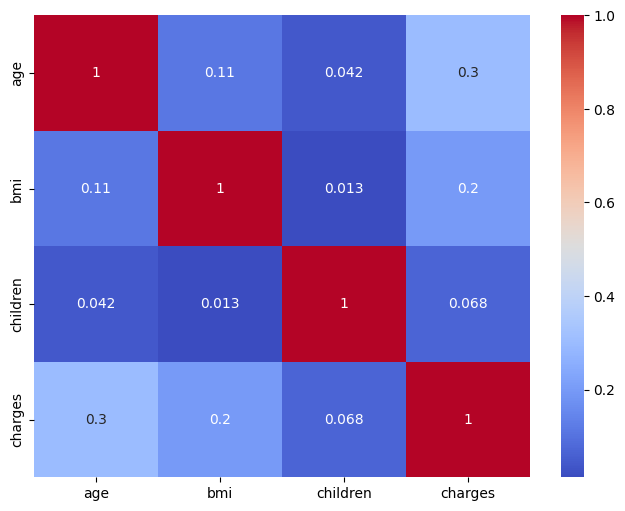

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Data Cleaning and Preprocessing

In [16]:
df_cleaned = df.copy()

In [17]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
# If we want to clean or drop and feature then we will use this copied data to perform operations.


df_cleaned.drop_duplicates(inplace=True)

In [19]:
df_cleaned.shape

(1337, 7)

In [20]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
# Lets value count in the data 
# Eg. Taking the sex column. --- So in it we can have data like male/MALE/Male/M. So simple male can be written in many formats. 

df_cleaned.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [23]:
# Now lets convert the categorical data into numerical data.

# For sex taking male as 0 and female as 1
# Label encoding is used to convert categorical data into numerical data.


df_cleaned['sex'] = df_cleaned['sex'].map({'male': 0, 'female': 1})

In [24]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [25]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [26]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'yes': 1, 'no': 0})

In [27]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [28]:
# Lets remname the Column name of sex to isfemale and smoker to issmoker.

df_cleaned.rename(columns={'sex': 'is_female', 'smoker': 'is_smoker'}, inplace=True)

In [29]:
df_cleaned.head()



,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [30]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [31]:
df_cleaned = pd.get_dummies(df_cleaned , columns = ['region'] , drop_first=True)



In [32]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [33]:
df_cleaned = df_cleaned.astype(int)

In [34]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

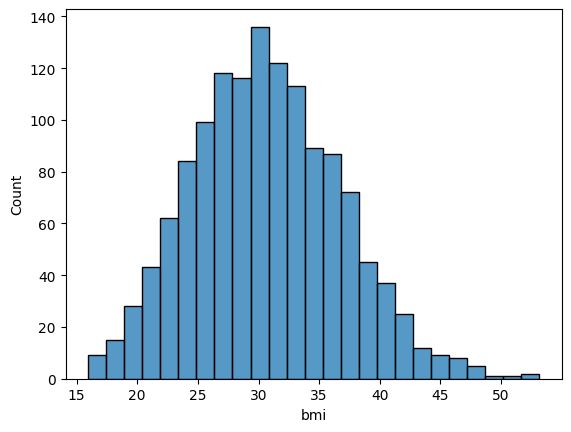

In [35]:
sns.histplot(df['bmi'])

In [36]:
df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obesity'])

In [37]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obesity
2,28,0,33,3,0,4449,0,1,0,Obesity
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight


In [38]:
# Spliting bmi_category

df_cleaned = pd.get_dummies(df_cleaned , columns = ['bmi_category'] , drop_first=True)

In [39]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False


In [40]:
df_cleaned = df_cleaned.astype(int)

In [41]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [42]:
## Feature Scaling

df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight',
       'bmi_category_Obesity'],
      dtype='object')

In [43]:
# Convert age, children and bmi to standard scaler

from sklearn.preprocessing import StandardScaler


cols = ['age', 'children', 'bmi']

scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [44]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [45]:
## Feature Extraction by Pearson Correlation




from scipy.stats import pearsonr



selected_features = [
    'age',
    'bmi',
    'children',
    'is_female',
    'is_smoker',
    'region_northwest',
    'region_southeast',
    'region_southwest',
    'bmi_category_Normal',
    'bmi_category_Overweight',
    'bmi_category_Obesity'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}


correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'] )



# Before showing the data we need to sort it in descending order.

correlations_df = correlations_df.sort_values(by='Pearson Correlation', ascending=False)

correlations_df










,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obesity,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [46]:
# Implementing chi square test for feature selection

cat_features = ['is_female', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest', 'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obesity']





In [47]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'],q= 4, labels=False)

chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat , p_val, _, _= chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }


chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value', ascending=True)
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obesity,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [48]:
final_df = df_cleaned[['age', 'bmi', 'children', 'is_female', 'is_smoker', 'region_southeast','bmi_category_Obesity', 'charges']]



In [49]:
final_df

,age,bmi,children,is_female,is_smoker,region_southeast,bmi_category_Obesity,charges
0,-1.440418,-0.517949,-0.909234,1,1,0,0,16884
1,-1.511647,0.462463,-0.079442,0,0,1,1,1725
2,-0.799350,0.462463,1.580143,0,0,1,1,4449
3,-0.443201,-1.334960,-0.909234,0,0,0,0,21984
4,-0.514431,-0.354547,-0.909234,0,0,0,0,3866
...,...,...,...,...,...,...,...,...
1333,0.767704,-0.027743,1.580143,0,0,0,1,10600
1334,-1.511647,0.135659,-0.909234,1,0,0,1,2205
1335,-1.511647,0.952670,-0.909234,1,0,1,1,1629
1336,-1.297958,-0.844753,-0.909234,1,0,0,0,2007
